Introduction & Instruction

As an introduction to computer vision, you are to perform the simple task of mood detection. Mood detection is the process of identifying and understanding a person's current emotional state. It can be done through a variety of methods, but we will focus on Facial expression recognition. Facial expressions are one of the most important cues for understanding human emotions. Mood detection systems can use computer vision techniques to analyze facial features and identify specific expressions, such as happiness, sadness, anger, you must attain the following objectives:

* Recognize when a face is yours or not.
* Recognize only your mood (happy, sad, angry, or confused).
* Perform testing to show the performance of your implementation.

### Recognize when a face is yours or not

In [ ]:
import numpy as np
import os
import cv2
import sys

def read_images(path, sz=None):
    c = 0
    X, y = [], []

    for dirname, dirnames, filenames in os.walk(path):
        for subdirname in dirnames:
            subject_path = os.path.join(dirname, subdirname)
            for filename in os.listdir(subject_path):
                try:
                    filepath = os.path.join(subject_path, filename)
                    im = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

                    # Resize the images to the prescribed size
                    if (sz is not None):
                        im = cv2.resize(im, (200, 200))

                    X.append(np.asarray(im, dtype=np.uint8))
                    y.append(c)

                except IOError as e:
                    print(f"I/O Error({e.errno}): {e.strerror}")
                except Exception as e:
                    print(f"Unexpected error: {str(e)}")
            c = c + 1
    return [X, y]

def face_rec():
    names = ['Jairo', 'Jody']  
    dataset_path = r"C:\Users\Jai\DATA SCIENCE 3\Mood Detection\face_dataset"  

    [X, y] = read_images(dataset_path)
    y = np.asarray(y, dtype=np.int32)

    model = cv2.face.LBPHFaceRecognizer_create()
    model.train(X, y)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier(r'C:\Users\Jai\DATA SCIENCE 3\Mood Detection\haarcascade_frontalface_default.xml')

    while True:
        ret, img = camera.read()
        if not ret:
            break

        faces = face_cascade.detectMultiScale(img, 1.3, 5)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
            roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                params = model.predict(roi)
                label = names[params[0]]
                cv2.putText(img, label, (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            except Exception as e:
                print(f"Prediction error: {str(e)}")
                continue

        cv2.imshow("camera", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

Test Output:

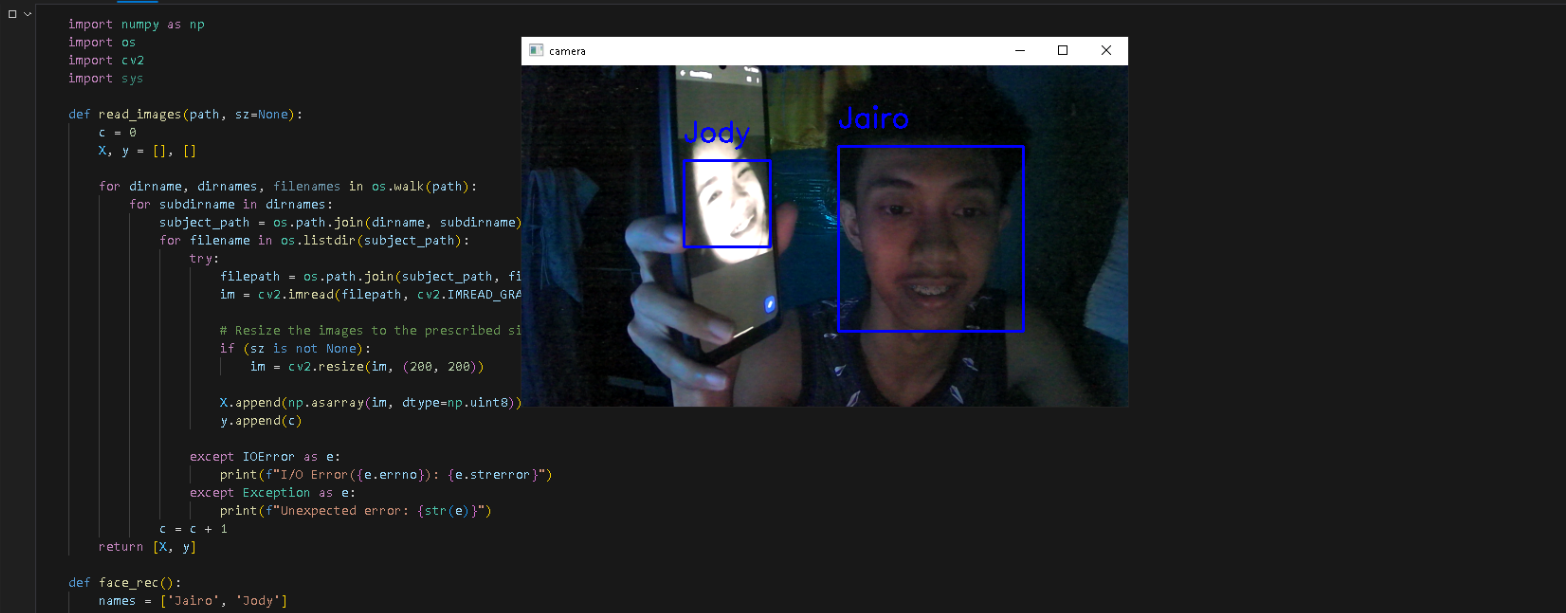

Inference:

It will identify if the other person's face or mine is being used for this procedure. To determine my face or her face in this instance, I utilised Jody's face as an example.

### Recognize only your mood

In [5]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def prepare_training_data(data_folder):
    faces = []
    labels = []

    # Define the moods and assign labels
    emotions = {
        "Happy": 0,
        "Sad": 1,
        "Angry": 2,
        "Neutral": 3
    }

    for emotion in emotions:
        emotion_folder = os.path.join(data_folder, emotion)
        for image_name in os.listdir(emotion_folder):
            image_path = os.path.join(emotion_folder, image_name)
            face = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            face = cv2.resize(face, (200, 200))  
            faces.append(face)
            labels.append(emotions[emotion])

    return faces, labels

# Path to the folder 
data_folder = r"C:\Users\Jai\DATA SCIENCE 3\Mood Detection\generated_dataset"  
faces, labels = prepare_training_data(data_folder)

faces = np.array(faces)
labels = to_categorical(labels) 
faces = faces.reshape(-1, 200, 200, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(faces, labels, test_size=0.10, random_state=42)

# Create a simple CNN model 
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=20, 
          validation_data=(X_test, y_test))  # Adjust epochs and batch_size as needed

# Save the model
model.save('mood_model.h5')

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 710ms/step - accuracy: 0.3865 - loss: 166.3440 - val_accuracy: 0.9500 - val_loss: 0.1551
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 685ms/step - accuracy: 0.9494 - loss: 0.2865 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 685ms/step - accuracy: 0.9680 - loss: 0.1155 - val_accuracy: 0.9500 - val_loss: 0.1048
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 677ms/step - accuracy: 0.9566 - loss: 0.1291 - val_accuracy: 1.0000 - val_loss: 0.0223
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 675ms/step - accuracy: 0.9994 - loss: 0.0110 - val_accuracy: 1.0000 - val_loss: 8.6008e-04
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 681ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 676ms/step - accuracy: 1.0000 - loss: 8.3500e-04 - val_accuracy: 1.0000 - val_loss: 5.8045e-04
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 677ms/step - accuracy: 1.0000 - loss: 4.8

In [7]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import img_to_array

loaded_model = load_model(r'C:\Users\Jai\DATA SCIENCE 3\Mood Detection\mood_model.h5')  

face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Define the emotions
emotions = {0: "Happy", 1: "Sad", 2: "Angry", 3: "Neutral"}

# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (200,200), interpolation=cv2.INTER_AREA)

        if np.sum([roi_gray]) !=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi, axis=0)
            roi = np.expand_dims(roi, axis=3)

            predicted_emotion = np.argmax(loaded_model.predict(roi))

            label = emotions[predicted_emotion]
            cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2, cv2.LINE_AA)

    cv2.imshow('Mood Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

Test Result:

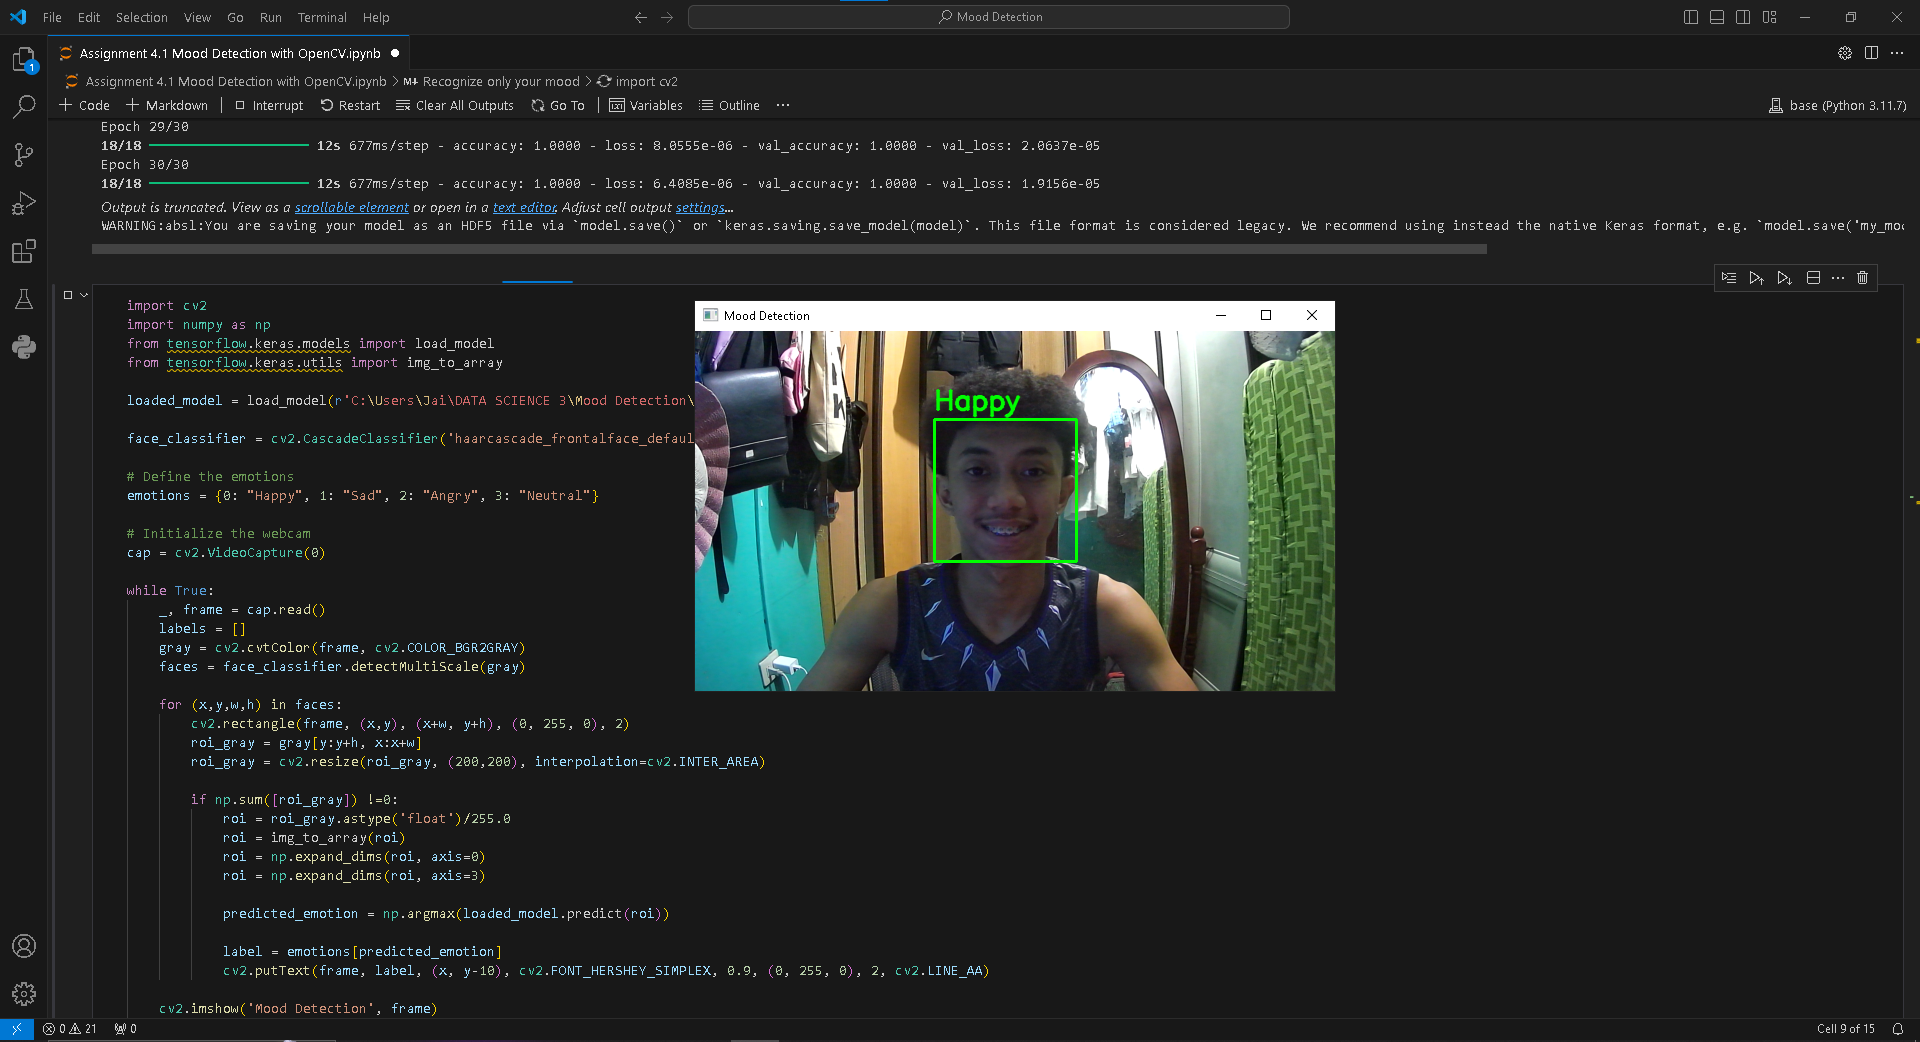

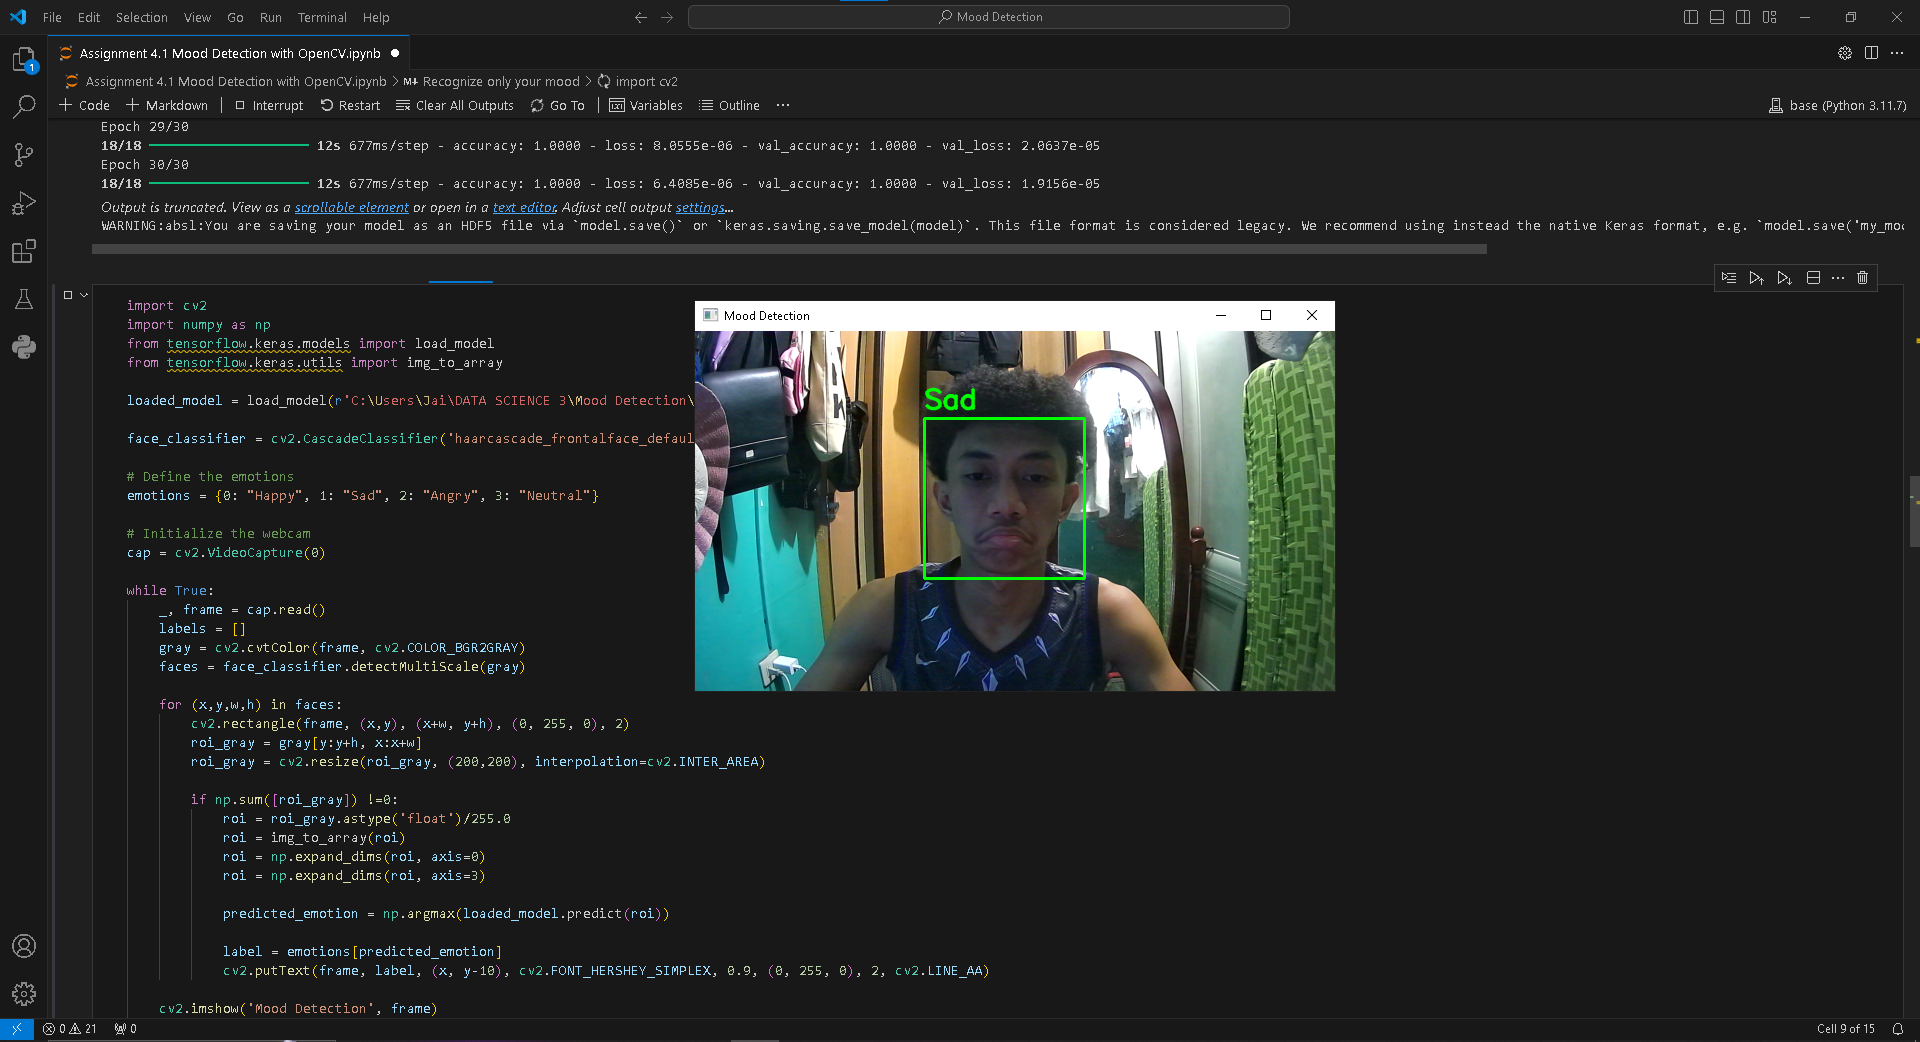

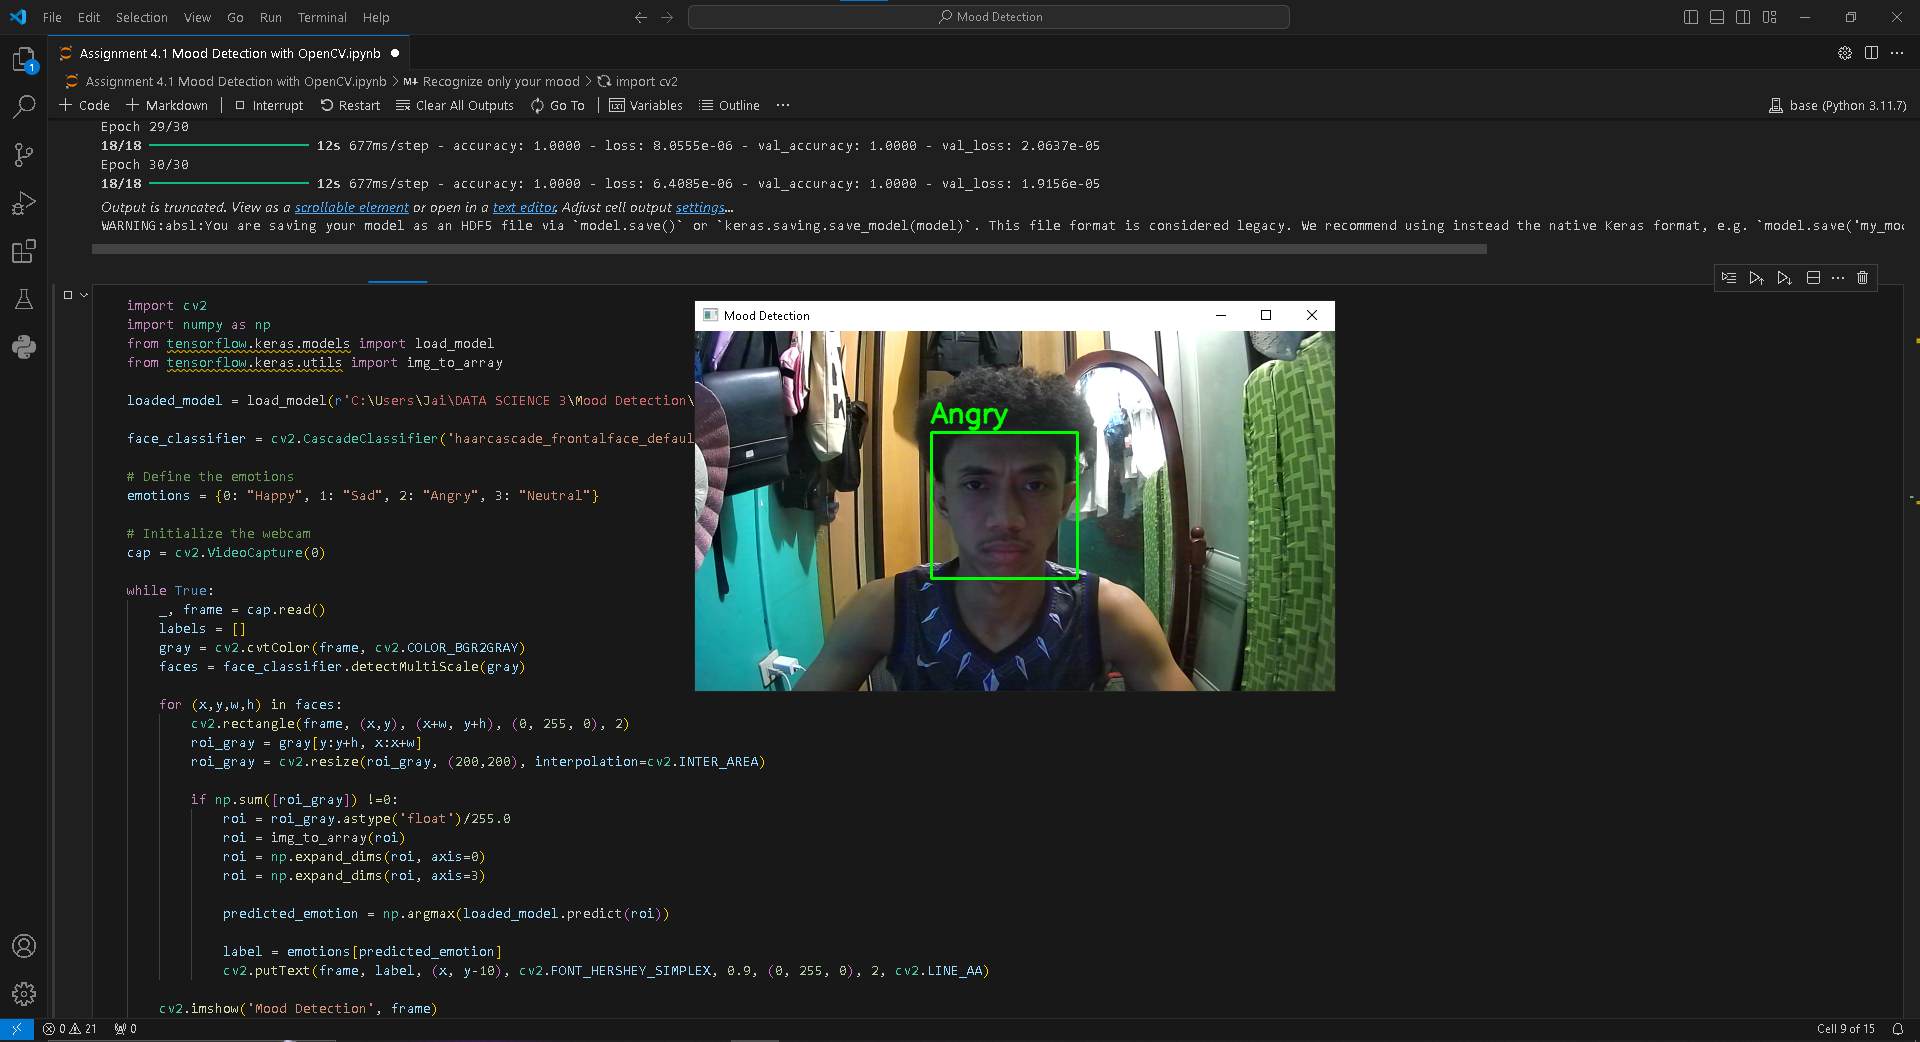

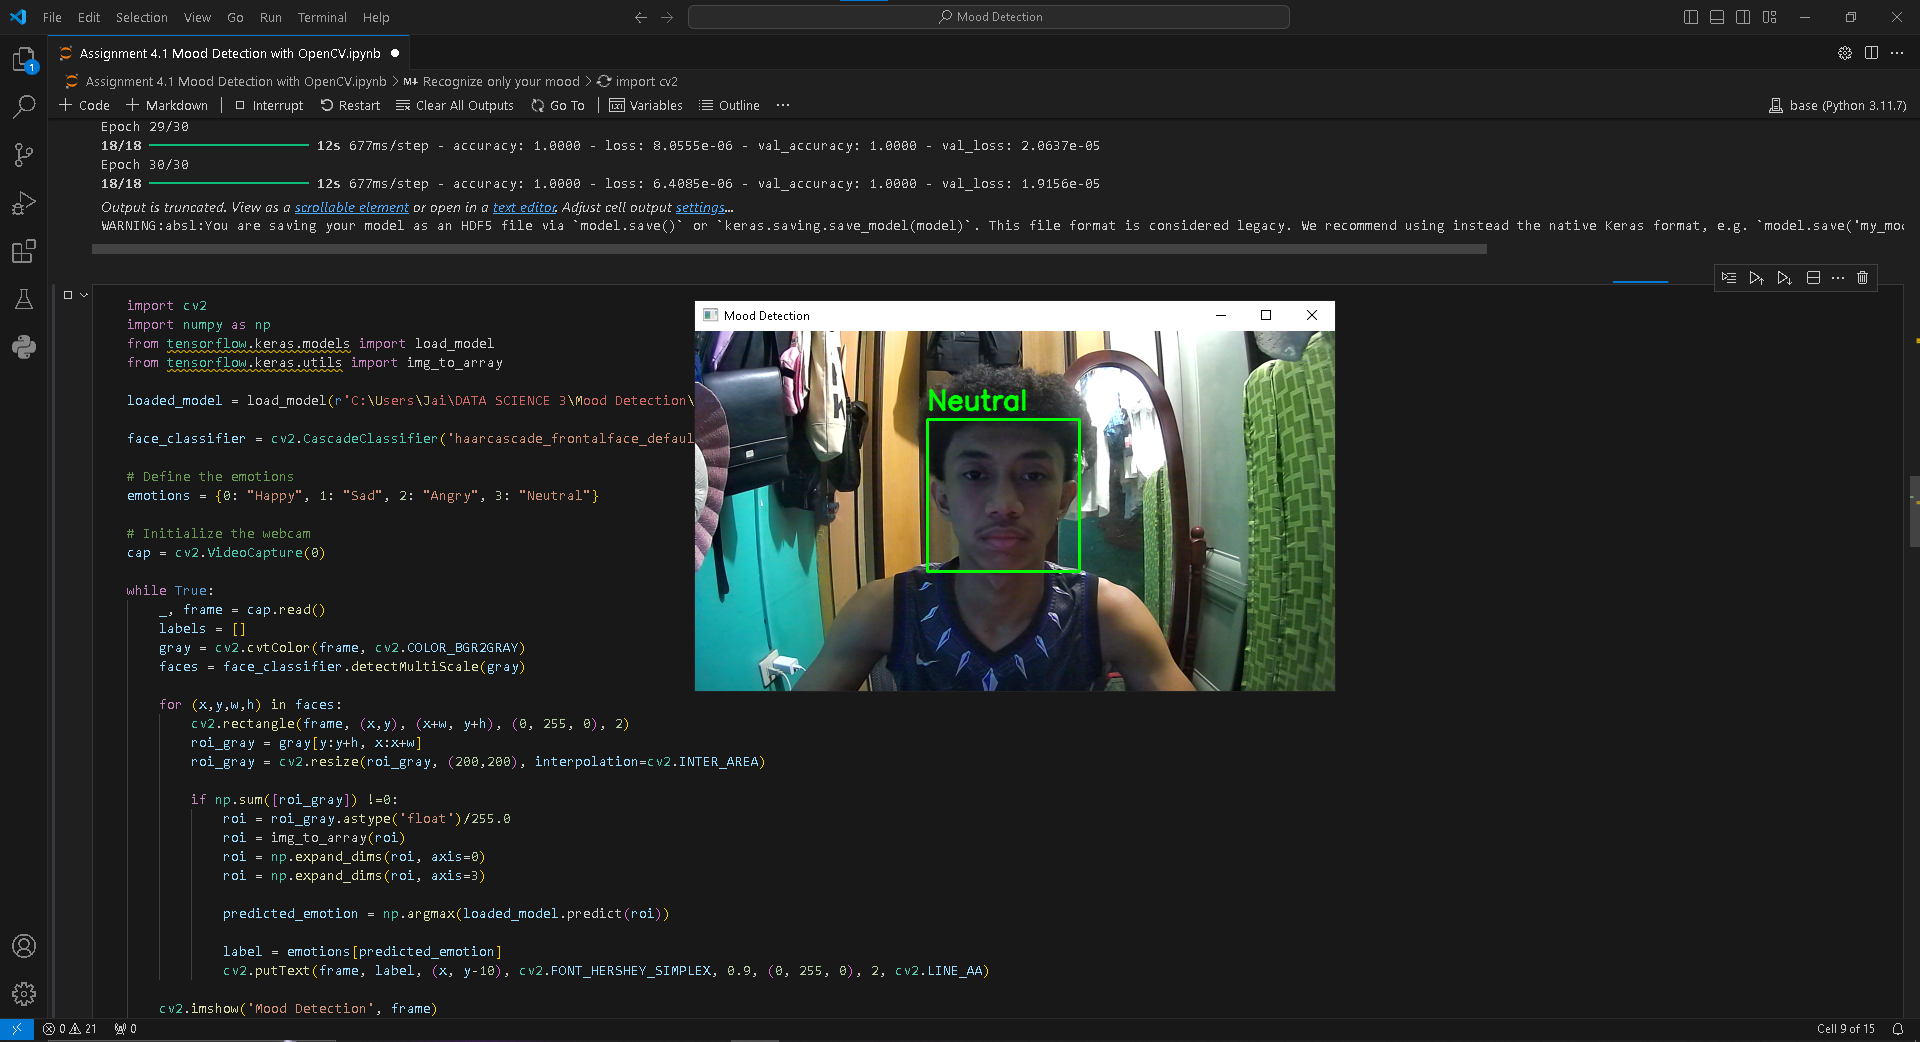

Inference:

It will identify which mood is recognised in this process. For example, I used four moods: neutral, angry, sad, and happy. Also, I trained the model using my face as a custom dataset and utilised it to validate the result.